In [53]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np

samochody = fetch_openml('cars1')
print(samochody.keys())
print('aa ',samochody['details'])
print(samochody['feature_names'])
# konwersja do int dla każdego elementu
y = samochody['data']
lista2 = []
for elem1 in y:
    lista = []
    for elem2 in elem1:
        lista.append(int(elem2))
    lista2.append(lista)
# konwersja listy list na macierz
z = np.asarray(lista2)
# przypisanie skonwertowanych danych do danych na których bazujemy
samochody['data']=z

print(samochody['data'][:5])
# Podzielmy zbiór na cechy oraz etykiety 
# wybieram ilość cylindrów i pojemność 

# miles per galon (MPG) & horsepower
X = samochody.data[:, [0,3]]
y = samochody.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

kmn = KMeans(n_clusters=4)

kmn.fit(X_train)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])
aa  {'id': '40700', 'name': 'cars1', 'version': '1', 'format': 'ARFF', 'upload_date': '2017-04-06T12:37:29', 'licence': 'public', 'url': 'https://www.openml.org/data/v1/download/4965299/cars1.arff', 'file_id': '4965299', 'default_target_attribute': 'class', 'tag': 'study_88', 'visibility': 'public', 'status': 'active', 'processing_date': '2018-10-04 07:09:41', 'md5_checksum': '1516c22643ed501f8b94b25568f49b92'}
['MPG', 'cylinders', 'cubicInches', 'horsepower', 'weightLbs', 'time-to-sixty', 'year']
[[  14    4  350  165 4209   12 1972]
 [  31    1   89   71 1925   14 1980]
 [  17    4  302  140 3449   11 1971]
 [  15    4  400  150 3761   10 1971]
 [  30    1   98   63 2051   17 1978]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

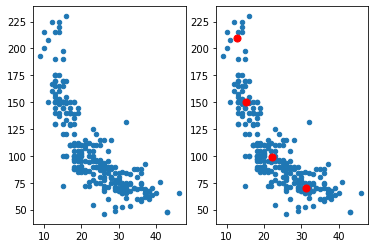

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

centra = kmn.cluster_centers_
fig, ax = plt.subplots(1,2)

ax[0].scatter(X_train[:, 0], X_train[:, 1], s=20)

y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], s=20)

ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

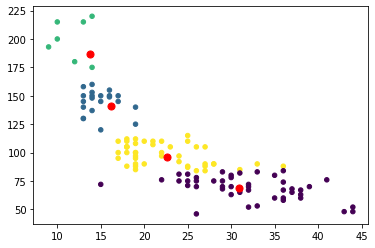

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline


y_pred = kmn.predict(X_test)


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)


plt.scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

In [ ]:
#zbiór jest podzielony na 4 grupy aut od paliwożernych super aut z dużą mocą do słabych aut które mają mniejsze spalanie
